# Analysis of Ozone and Precursor Emissions

Goal: Continue building our familiarity with atmospheric datasets and how they can be used to examine research questions in atmospheric chemistry.
We will be continuing our exploration of data available via the EPA's Air Quality Data system and utilizing it to explore ozone production locally over multiple years. The results will contribute to your first lab report.


In [1]:
%matplotlib inline
%pip install --user pyrsig pycno pyproj netcdf4

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import datetime as dt
from dateutil.parser import parse
import pyrsig


The first step is to load the data sets we will be working with. We will be using the library pyrsig to extract useful data sets from the Environmental Protection Agencies Remote Sensing Information Gateway (RSIG) https://www.epa.gov/hesc/remote-sensing-information-gateway This contains a huge variety of data that can be queried. Note that depending on your request and bounding box parameters, there might not be data associated with a given variable.

An example query setup is given below, modify it to extract data from 2020 rather than 2023



In [2]:

# create a query for data. This gives the values around Whittier
# (defined using latitude and longitude) from a variety of data sources.
# You can change the date range and bounding box to suit your needs.

rsigapi = pyrsig.RsigApi(
    bdate='2023-01-01', edate='2023-12-31',
    bbox=(-118.05, 33.98, -117.7, 34.1)
)

# This list all available datasets!
print([k for k in rsigapi.keys()])


['airnow.pm25', 'airnow.pm10', 'airnow.ozone', 'airnow.no', 'airnow.no2', 'airnow.nox', 'airnow.so2', 'airnow.co', 'airnow.temperature', 'airnow.pressure', 'airnow.rh', 'airnow2.pm25', 'airnow2.ozone', 'airnow2.no2', 'airnow2.so2', 'airnow2.co', 'aqs.pm25', 'aqs.pm25_daily_average', 'aqs.pm25_daily_filter', 'aqs.pm10', 'aqs.ozone', 'aqs.ozone_8hour_average', 'aqs.ozone_daily_8hour_maximum', 'aqs.co', 'aqs.so2', 'aqs.no2', 'aqs.nox', 'aqs.noy', 'aqs.rh', 'aqs.temperature', 'aqs.pressure', 'ceilometer.aerosol_layer_heights', 'cmaq.equates.conus.aconc.O3', 'cmaq.equates.conus.aconc.NO2', 'cmaq.equates.conus.aconc.PM25', 'hms.fire_ecosys', 'hms.fire_power', 'hms.smoke', 'metar.elevation', 'metar.visibility', 'metar.seaLevelPress', 'metar.temperature', 'metar.dewpoint', 'metar.relativeHumidity', 'metar.windDir', 'metar.windSpeed', 'metar.windGustSpeed', 'metar.wind', 'metar.altimeter', 'metar.minTemp24Hour', 'metar.maxTemp24Hour', 'metar.precip1Hour', 'metar.precip3Hour', 'metar.precip6Hour

Lets first acquire an ozone data set from the AQS and plot it like we did last week. Add a horizontal line indicating the NAAQS for ozone to aid interpration. Given that ozone is a pollutant of concern, what do you notice about the ozone time series? Are values above the NAAQS for ozone? When does this happen, how frequently does this happen?


['airnow.ozone', 'airnow2.ozone', 'aqs.ozone', 'aqs.ozone_8hour_average', 'aqs.ozone_daily_8hour_maximum', 'pandora.ozonepandora.L2_rfuh5p1_8.formaldehyde_tropospheric_vertical_column_amount', 'pandora.L2_rout2p1_8.ozone_vertical_column_amount', 'pandora.L2_rout2p1_8.direct_ozone_air_mass_factor', 'pandora.L2_rout2p1_8.ozone_air_mass_factor_uncertainty', 'tempo.proxy_l2.o3p.total_ozone_column', 'tempo.proxy_l2.o3p.troposphere_ozone_column', 'tempo.proxy_l2.o3p.stratosphere_ozone_column', 'tempo.proxy_l2.o3p.ozone_information_content']


<ipython-input-3-7e927ac719f9>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aqsds = df.groupby(['time']).median()['ozone']


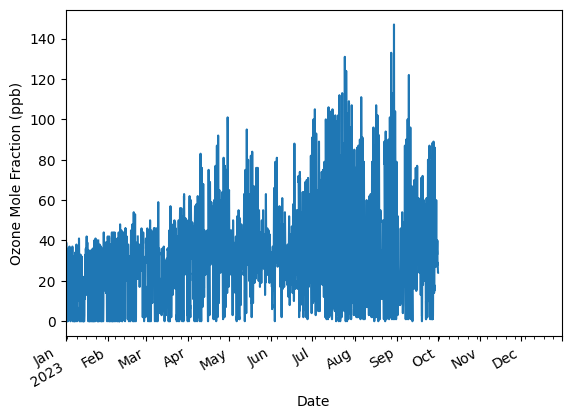

In [3]:
# list available ozone datasets
print([k for k in rsigapi.keys() if 'ozone' in k])
# Exract the desired values to a data frame
df = rsigapi.to_dataframe('aqs.ozone',parse_dates=True, unit_keys=False)

# calculate hourly medians using the pandos groupby function for all available sites, just Pico Rivera is in the bounding box
aqsds = df.groupby(['time']).median()['ozone']
fig, ax=plt.subplots()
aqsds.plot()
plt.xlabel('Date')
plt.ylabel('Ozone Mole Fraction (ppb)')
# fix time labels so you can actually see them
fig.autofmt_xdate()
#save figure at publication quality resolution, you will likely want to change the name of the output figure
plt.savefig('o3_timeseries_DrPeterson.png', dpi = 300)

Now, let us acquire some other data. Start by obtaining NO2 data from RSIG. Add a horizontal line to indicate the NAAQS for NOx of 100 ppb. Note that you will want to rename things so you can access both your ozone data set and your no2 data set! Write your code to do this in the cell below.  

In [ ]:
# Your code to do this goes here

## Timeseries Analysis ##
Given that NO$_2$ is also a pollutant of concern, what do you notice about the time series? Are values above the NAAQS for ozone? When does this happen, how frequently does this happen? How does this compare to the ozone timeseries?

# Resampling of Data, The joys of timezones
Often times you will run into the need to compare data from differing instruments that collect data with differing temporal resolution. Thus it is neccesary to move data to a common time bin/coordinate. This process is called resampling. The data from the AQS are hourly, but sometimes it is helpful to see how things vary more broady by smoothing things out. Plot monthly averages for both pollutants in the cell below. Skeletal code to plot a daily ozone average is provided, this will need to be modified.

UTC
Europe/Berlin


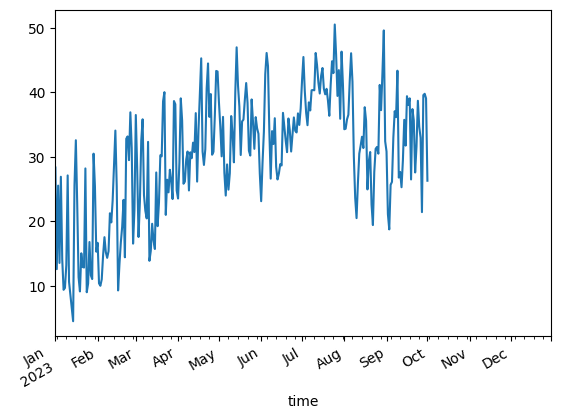

In [4]:
# Your data also have a UTC timezone, often times it can be useful to change the timezone of the dataset,
# data shared with others should always be in UTC!
print(aqsds.index.tz) # print current timezone
aqsds=aqsds.tz_convert('Europe/Berlin') # convert to a new timezone
print(aqsds.index.tz) # print updated timezone


day_ozone = aqsds.resample('1d').mean()

day_ozone.plot()
plt.gcf().autofmt_xdate()
plt.show()

# Manipulation of datasets
Here we go through some common ways to visualize datasets

                           ozone
time                            
2023-01-01 01:00:00+01:00   17.0
2023-01-01 02:00:00+01:00   15.0
2023-01-01 03:00:00+01:00   14.0
2023-01-01 04:00:00+01:00   17.0
2023-01-01 05:00:00+01:00   17.0
...                          ...
2023-12-30 21:00:00+01:00    NaN
2023-12-30 22:00:00+01:00    NaN
2023-12-30 23:00:00+01:00    NaN
2023-12-31 00:00:00+01:00    NaN
2023-12-31 01:00:00+01:00    NaN

[8737 rows x 1 columns]


array([[<Axes: title={'center': 'ozone'}>]], dtype=object)

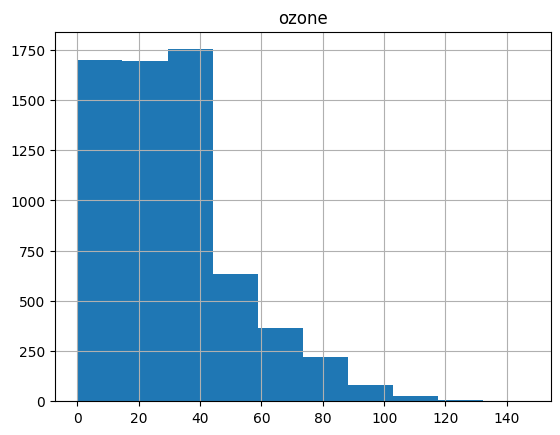

In [5]:
ozone_df=aqsds.to_frame() # convert series to data frame
print(ozone_df)
# Histogram plot
ozone_df.hist()


array([<Axes: title={'center': 'ozone'}, xlabel='[month]'>,
       <Axes: title={'center': 'start_hour'}, xlabel='[month]'>],
      dtype=object)

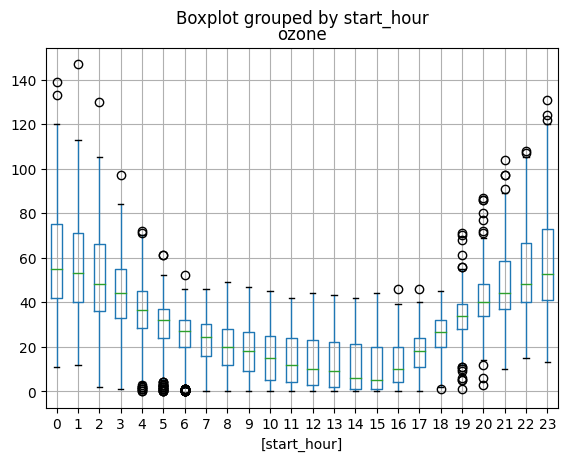

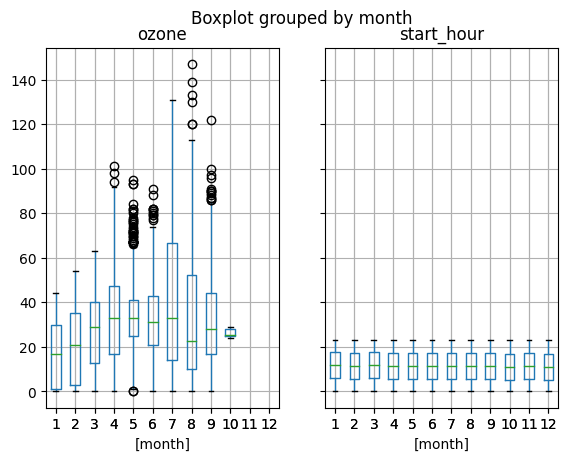

In [6]:
# Diurnal cycle
ozone_df['start_hour']=aqsds.index.hour # extracts hour of measurement, writes as a column in the data set,
#note that these times are in UTC not local, which complicates interpretation

ozone_df.boxplot(by='start_hour')

# Seasonal cycle
ozone_df['month']=aqsds.index.month # extracts hour of measurement, writes as a column in the data set

ozone_df.boxplot(by='month')

## Meterological Data

Given the impact of weather on atmospheric chemistry, it is often helpful to have data the shows us meterological variables over time. These data can be obtained in a similar manner to the other data sets. Pick an available meterological variable to query from the database and plot it to ensure it imported properly.

In [8]:
# We will enlarge the bounding box for the query to ensure we get data.
rsigapi = pyrsig.RsigApi(
    bdate='2023-01-01', edate='2023-12-31',
    bbox=(-119, 33.5, -117, 34.5)
)

# Construct the query for meterological data as before





# Impacts of weather on atmospheric data
Use the three collected data sets to explore potential relationships between the variables. Plot diurnal and seasonal cycles for each one. Do they make sense given what we learned in class?

## <font color = '545AA7'> References </font>

Weiss, C. J. (2017). Scientific Computing for Chemists: An Undergraduate Course in Simulations, Data Processing, and Visualization. Journal of Chemical Education, 94(5), 592–597. https://doi.org/10.1021/acs.jchemed.7b00078
